In [95]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split

warnings.filterwarnings('ignore')
%matplotlib inline

In [96]:
df = pd.read_csv('FinalDataset.csv')

In [97]:
df = df.fillna(0)

In [98]:
Y = df.ix[:,3]
X = df.ix[:,1:3]

In [99]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.4,random_state = 1)

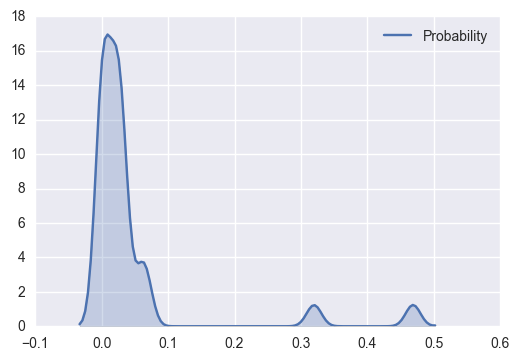

In [100]:
#Visualizing the Probability Distribution.
sns.kdeplot(y_train,shade=True)

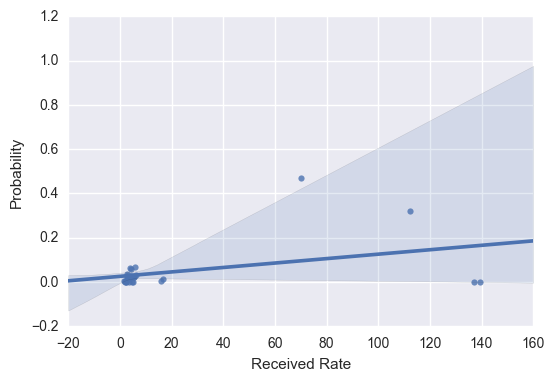

In [101]:
sns.regplot(x_train.ix[:,0],y_train)

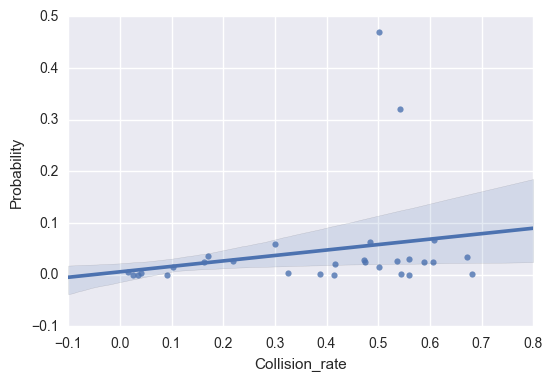

In [102]:
sns.regplot(x_train.ix[:,1],y_train)